In [1]:
from mp1 import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D

Using TensorFlow backend.


#Simple classification

For this first simple network, we want to linearly classify an image into shape categories (rectangle, disk, triangle). 
Thus, we will use a 1-layer neural network for this task. 

In [2]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = np_utils.to_categorical(Y_train, 3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [3]:
print(X_train.shape)

(300, 10000)


In [4]:
model = Sequential()
model.add(Dense(3,  input_dim = 10000, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer="SGD")
model.fit(X_train, Y_train, epochs=15, batch_size=32)

Epoch 1/15
300/300 [==============================] - 0s 1ms/step - loss: 10.1215
Epoch 2/15
300/300 [==============================] - 0s 232us/step - loss: 10.9066
Epoch 3/15
300/300 [==============================] - 0s 225us/step - loss: 10.9066
Epoch 4/15
300/300 [==============================] - 0s 226us/step - loss: 10.9066
Epoch 5/15
300/300 [==============================] - 0s 213us/step - loss: 10.9066
Epoch 6/15
300/300 [==============================] - 0s 282us/step - loss: 10.9066
Epoch 7/15
300/300 [==============================] - 0s 244us/step - loss: 10.9066
Epoch 8/15
300/300 [==============================] - 0s 245us/step - loss: 10.9066
Epoch 9/15
300/300 [==============================] - 0s 255us/step - loss: 10.9066
Epoch 10/15
300/300 [==============================] - 0s 185us/step - loss: 10.9066
Epoch 11/15
300/300 [==============================] - 0s 261us/step - loss: 10.9066
Epoch 12/15
300/300 [==============================] - 0s 208us/step - loss:

In [5]:
modelAdam = Sequential()
modelAdam.add(Dense(3,  input_dim = 10000, activation='softmax'))
modelAdam.compile(loss='categorical_crossentropy',optimizer="Adam" ,metrics=['accuracy'])
modelAdam.fit(X_train, Y_train, epochs=30, batch_size=32)

Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 5.7348
Epoch 2/30
300/300 [==============================] - 0s 245us/step - loss: 2.3896
Epoch 3/30
300/300 [==============================] - 0s 247us/step - loss: 1.2372
Epoch 4/30
300/300 [==============================] - 0s 240us/step - loss: 0.6816
Epoch 5/30
300/300 [==============================] - 0s 229us/step - loss: 0.2626
Epoch 6/30
300/300 [==============================] - 0s 242us/step - loss: 0.2056
Epoch 7/30
300/300 [==============================] - 0s 237us/step - loss: 0.1843
Epoch 8/30
300/300 [==============================] - 0s 234us/step - loss: 0.1470
Epoch 9/30
300/300 [==============================] - 0s 226us/step - loss: 0.1220
Epoch 10/30
300/300 [==============================] - 0s 229us/step - loss: 0.1088
Epoch 11/30
300/300 [==============================] - 0s 234us/step - loss: 0.1175
Epoch 12/30
300/300 [==============================] - 0s 236us/step - loss: 0.0921
Epo

Test the models

In [6]:
X_test1 = generate_a_rectangle()
X_test1 = X_test1.reshape(1, X_test1.shape[0])
X_test2 = generate_a_disk()
X_test2 = X_test2.reshape(1, X_test2.shape[0])
X_test3 = generate_a_triangle()[0]
X_test3 = X_test3.reshape(1, X_test3.shape[0])
print("Model with SGD optimizer \n =============================")
print(model.predict(X_test1))
print(model.predict(X_test2))
print(model.predict(X_test3))
print("Model with Adam optimizer \n =============================")
print(modelAdam.predict(X_test1))
print(modelAdam.predict(X_test2))
print(modelAdam.predict(X_test3))

Model with SGD optimizer 
[[ 0.  0.  1.]]
[[ 0.  0.  1.]]
[[ 0.  0.  1.]]
Model with Adam optimizer 
[[ 1.  0.  0.]]
[[ 0.  1.  0.]]
[[ 0.  0.  1.]]


In [7]:
[X_test, Y_test] = generate_test_set_classification(300)

model.evaluate(X_test, Y_test)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 0s 241us/step


11.551301803588867

# Visualization of the solution

In [8]:
import matplotlib.cm as cm 

In [9]:
weights = modelAdam.get_weights()

In [10]:
col1 = np.array([elem[0] for elem in weights[0]]).reshape((100,100))
col2 = np.array([elem[1] for elem in weights[0]]).reshape((100,100))
col3 = np.array([elem[2] for elem in weights[0]]).reshape((100,100))

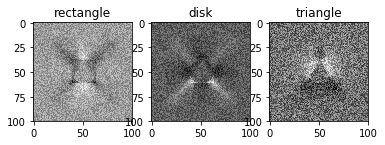

In [11]:
plt.subplot(131)
plt.imshow(col1, cmap='gray')
plt.title('rectangle')

plt.subplot(132)
plt.imshow(col2, cmap='gray')
plt.title('disk')

plt.subplot(133)
plt.imshow(col3, cmap='gray')
plt.title('triangle')

plt.show()

# A More Difficult Classification Problem

In [12]:
[X_train1, Y_train1] = generate_dataset_classification(1000, 20, True)
Y_train1 = np_utils.to_categorical(Y_train1)
X_train1 = X_train1.reshape(1000,100,100,1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [13]:
[X_test1, Y_test1] = generate_test_set_classification(500)
X_test1 = X_test1.reshape(500,100,100,1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [14]:
#Y_test1 = np_utils.to_categorical(Y_test1)

model1 = Sequential()
model1.add(Conv2D(64, (5,5), input_shape = (100,100,1), activation='relu'))
print(model1.output_shape)
model1.add(MaxPooling2D(pool_size = (4,4)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(124, activation='relu'))
model1.add(Dense(3, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

(None, 96, 96, 64)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 124)               4571260   
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 375       
Total params: 4,573,299
Trainable params: 4,573,299
Non-trainable params: 0
_______________________________________________

In [15]:
model1.fit(X_train1, Y_train1, epochs=15, batch_size=32)

Epoch 1/15
1000/1000 [==============================] - 29s 29ms/step - loss: 1.4880 - acc: 0.4890
Epoch 2/15
1000/1000 [==============================] - 27s 27ms/step - loss: 0.7741 - acc: 0.6830
Epoch 3/15
1000/1000 [==============================] - 26s 26ms/step - loss: 0.6460 - acc: 0.7350
Epoch 4/15
1000/1000 [==============================] - 26s 26ms/step - loss: 0.5671 - acc: 0.7970
Epoch 5/15
1000/1000 [==============================] - 25s 25ms/step - loss: 0.4821 - acc: 0.8280
Epoch 6/15
1000/1000 [==============================] - 25s 25ms/step - loss: 0.3855 - acc: 0.8770
Epoch 7/15
1000/1000 [==============================] - 25s 25ms/step - loss: 0.3439 - acc: 0.8870
Epoch 8/15
1000/1000 [==============================] - 25s 25ms/step - loss: 0.2597 - acc: 0.9300
Epoch 9/15
1000/1000 [==============================] - 25s 25ms/step - loss: 0.2058 - acc: 0.9360
Epoch 10/15
1000/1000 [==============================] - 25s 25ms/step - loss: 0.1875 - acc: 0.9490
Epoch 11/

In [16]:
model1.evaluate(X_test1, Y_test1)

1000/1000 [==============================] - 7s 7ms/step


[0.29999895521998404, 0.89200000000000002]

# Regression problem

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


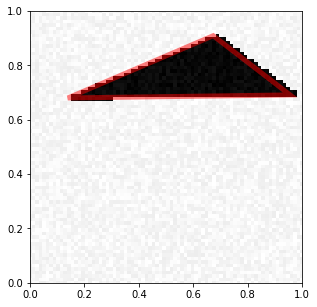

(300, 10000)
10000


In [17]:
[X_train2, Y_train2] = generate_dataset_regression(300, 20)
#X_train2 = X_train2.reshape(300,100,100,1)
#Y_train2 /= np.linalg.norm(Y_train2)
#(X_train2/np.linalg.norm(X_train2))
visualize_prediction(X_train2[0], Y_train2[0])
print(X_train2.shape)
print(X_train2.shape[1])

In [18]:
[X_test2, Y_test2] = generate_test_set_regression()
#X_test2 /= np.linalg.norm(X_test2)
#X_test2 = X_test2.reshape(300,100,100,1)
#Y_test2 /= np.linalg.norm(Y_test2)
print(Y_test2.shape)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
(300, 6, 3)


In [19]:
model2 = Sequential()
model2.add(Conv2D(16, (5,5), input_shape = (100,100,1), activation='relu'))
model2.add(MaxPooling2D(pool_size = (4,4)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(2, activation='relu'))

model2.compile(loss='mean_squared_error', optimizer='adam')
print(model2.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 96, 96, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18434     
Total params: 18,850
Trainable params: 18,850
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
print(X_train2.shape)
print(Y_train2.shape)
print(Y_train2)

(300, 10000)
(300, 6)
[[ 0.95664594  0.69114425  0.13892667  0.68002715  0.67375065  0.90914099]
 [ 0.57641848  0.19620874  0.93170221  0.13421338  0.44652102  0.88566276]
 [ 0.82647601  0.11275966  0.41630188  0.75806256  0.93873455  0.61193313]
 ..., 
 [ 0.2626464   0.9984572   0.57157753  0.04735306  0.37542757  0.72773053]
 [ 0.5136718   0.58209325  0.34285549  0.32096361  0.38451635  0.8725518 ]
 [ 0.34731142  0.9550024   0.17915064  0.86491841  0.12748046  0.05618591]]


In [21]:
X_train2 = X_train2.reshape(300,100,100,1)
#Y_train2 =np_utils.to_categorical(Y_train2, 3)

In [22]:
print(Y_train2.shape)

(300, 6)


In [23]:

model2.fit(X_train2, Y_train2,epochs=10, batch_size=32)

#validation_data=(X_test2, Y_test2)          
          

ValueError: Error when checking target: expected dense_5 to have shape (None, 2) but got array with shape (300, 6)

In [ ]:
visualize_prediction(X_test2[0],model2.predict(X_test2)[0])